In [1]:
import numpy as np

In [2]:
import scipy.io


mat = scipy.io.loadmat('Channels_est.mat') #carrega o arquivo .mat
x=mat.get('H_est') # pega o canal estimado LS (feature)

mat1 = scipy.io.loadmat('Channels.mat') #carrega o arquivo .mat
y = mat1.get('H') # pega o canal original (target)

In [3]:
feature = np.concatenate((np.real(x[1,0:5000,:,0]), np.imag(x[1,0:5000,:,0])), axis=1)
target = np.concatenate((np.real(y[1,0:5000,:,0]), np.imag(y[1,0:5000,:,0])), axis=1)

In [4]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, random_state=11)

In [5]:
import tensorflow as tf
from tensorflow.python.keras import *
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import *

In [6]:
inputs = tf.keras.Input(shape=(24,))
temp = tf.keras.layers.Dense(24,activation=tf.nn.relu)(inputs)
outputs = tf.keras.layers.Dense(24)(temp)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24)]              0         
_________________________________________________________________
dense (Dense)                (None, 24)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
Total params: 1,200
Trainable params: 1,200
Non-trainable params: 0
_________________________________________________________________


In [8]:
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss="mse", optimizer=opt, metrics=[tf.keras.metrics.MeanSquaredError()])

In [9]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
            ]

In [10]:
history = model.fit(
    feature_train,
    target_train,
    callbacks=callbacks,
    batch_size=128,
    epochs=500,
    validation_data=(feature_test, target_test),
)

Epoch 1/500
32/32 [==============================] - 1s 9ms/step - loss: 0.5993 - mean_squared_error: 0.5993 - val_loss: 0.5474 - val_mean_squared_error: 0.5474
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.5317 - mean_squared_error: 0.5317 - val_loss: 0.4820 - val_mean_squared_error: 0.4820
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.4624 - mean_squared_error: 0.4624 - val_loss: 0.4255 - val_mean_squared_error: 0.4255
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.4131 - mean_squared_error: 0.4131 - val_loss: 0.3776 - val_mean_squared_error: 0.3776
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.3626 - mean_squared_error: 0.3626 - val_loss: 0.3369 - val_mean_squared_error: 0.3369
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.3254 - mean_squared_error: 0.3254 - val_loss: 0.3010 - val_mean_squared_error: 0.3010
Epoch 7/500
32/32 [===============

32/32 [==============================] - 0s 2ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 52/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 53/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 54/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 55/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 56/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 57/500
32/32 [=====================

32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 102/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 103/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 104/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 105/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 106/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 107/500
32/32 [===============

32/32 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 152/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 153/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 154/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 155/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 156/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 157/500
32/32 [===============

32/32 [==============================] - 0s 2ms/step - loss: 8.2733e-04 - mean_squared_error: 8.2733e-04 - val_loss: 7.9679e-04 - val_mean_squared_error: 7.9679e-04
Epoch 200/500
32/32 [==============================] - 0s 1ms/step - loss: 8.6032e-04 - mean_squared_error: 8.6032e-04 - val_loss: 7.8541e-04 - val_mean_squared_error: 7.8541e-04
Epoch 201/500
32/32 [==============================] - 0s 2ms/step - loss: 8.0713e-04 - mean_squared_error: 8.0713e-04 - val_loss: 7.7642e-04 - val_mean_squared_error: 7.7642e-04
Epoch 202/500
32/32 [==============================] - 0s 2ms/step - loss: 8.0199e-04 - mean_squared_error: 8.0199e-04 - val_loss: 7.6579e-04 - val_mean_squared_error: 7.6579e-04
Epoch 203/500
32/32 [==============================] - 0s 2ms/step - loss: 7.7363e-04 - mean_squared_error: 7.7363e-04 - val_loss: 7.5620e-04 - val_mean_squared_error: 7.5620e-04
Epoch 204/500
32/32 [==============================] - 0s 2ms/step - loss: 7.8805e-04 - mean_squared_error: 7.8805e-04 

Epoch 245/500
32/32 [==============================] - 0s 2ms/step - loss: 4.1564e-04 - mean_squared_error: 4.1564e-04 - val_loss: 3.8492e-04 - val_mean_squared_error: 3.8492e-04
Epoch 246/500
32/32 [==============================] - 0s 1ms/step - loss: 3.9175e-04 - mean_squared_error: 3.9175e-04 - val_loss: 3.7876e-04 - val_mean_squared_error: 3.7876e-04
Epoch 247/500
32/32 [==============================] - 0s 3ms/step - loss: 3.9055e-04 - mean_squared_error: 3.9055e-04 - val_loss: 3.7198e-04 - val_mean_squared_error: 3.7198e-04
Epoch 248/500
32/32 [==============================] - 0s 2ms/step - loss: 3.8110e-04 - mean_squared_error: 3.8110e-04 - val_loss: 3.6455e-04 - val_mean_squared_error: 3.6455e-04
Epoch 249/500
32/32 [==============================] - 0s 2ms/step - loss: 3.7336e-04 - mean_squared_error: 3.7336e-04 - val_loss: 3.5798e-04 - val_mean_squared_error: 3.5798e-04
Epoch 250/500
32/32 [==============================] - 0s 2ms/step - loss: 3.6438e-04 - mean_squared_erro

Epoch 291/500
32/32 [==============================] - 0s 2ms/step - loss: 1.8497e-04 - mean_squared_error: 1.8497e-04 - val_loss: 1.7636e-04 - val_mean_squared_error: 1.7636e-04
Epoch 292/500
32/32 [==============================] - 0s 2ms/step - loss: 1.8193e-04 - mean_squared_error: 1.8193e-04 - val_loss: 1.7402e-04 - val_mean_squared_error: 1.7402e-04
Epoch 293/500
32/32 [==============================] - 0s 2ms/step - loss: 1.8258e-04 - mean_squared_error: 1.8258e-04 - val_loss: 1.7127e-04 - val_mean_squared_error: 1.7127e-04
Epoch 294/500
32/32 [==============================] - 0s 2ms/step - loss: 1.7589e-04 - mean_squared_error: 1.7589e-04 - val_loss: 1.6908e-04 - val_mean_squared_error: 1.6908e-04
Epoch 295/500
32/32 [==============================] - 0s 2ms/step - loss: 1.8181e-04 - mean_squared_error: 1.8181e-04 - val_loss: 1.6651e-04 - val_mean_squared_error: 1.6651e-04
Epoch 296/500
32/32 [==============================] - 0s 2ms/step - loss: 1.7555e-04 - mean_squared_erro

Epoch 337/500
32/32 [==============================] - 0s 2ms/step - loss: 1.1571e-04 - mean_squared_error: 1.1571e-04 - val_loss: 1.0173e-04 - val_mean_squared_error: 1.0173e-04
Epoch 338/500
32/32 [==============================] - 0s 2ms/step - loss: 1.0498e-04 - mean_squared_error: 1.0498e-04 - val_loss: 1.0014e-04 - val_mean_squared_error: 1.0014e-04
Epoch 339/500
32/32 [==============================] - 0s 2ms/step - loss: 1.0223e-04 - mean_squared_error: 1.0223e-04 - val_loss: 9.9698e-05 - val_mean_squared_error: 9.9698e-05
Epoch 340/500
32/32 [==============================] - 0s 2ms/step - loss: 1.0301e-04 - mean_squared_error: 1.0301e-04 - val_loss: 9.8138e-05 - val_mean_squared_error: 9.8138e-05
Epoch 341/500
32/32 [==============================] - 0s 2ms/step - loss: 1.0127e-04 - mean_squared_error: 1.0127e-04 - val_loss: 9.7567e-05 - val_mean_squared_error: 9.7567e-05
Epoch 342/500
32/32 [==============================] - 0s 2ms/step - loss: 9.8950e-05 - mean_squared_erro

Epoch 383/500
32/32 [==============================] - 0s 2ms/step - loss: 7.1780e-05 - mean_squared_error: 7.1780e-05 - val_loss: 6.8842e-05 - val_mean_squared_error: 6.8842e-05
Epoch 384/500
32/32 [==============================] - 0s 2ms/step - loss: 7.2361e-05 - mean_squared_error: 7.2361e-05 - val_loss: 6.8460e-05 - val_mean_squared_error: 6.8460e-05
Epoch 385/500
32/32 [==============================] - 0s 2ms/step - loss: 6.9463e-05 - mean_squared_error: 6.9463e-05 - val_loss: 6.8077e-05 - val_mean_squared_error: 6.8077e-05
Epoch 386/500
32/32 [==============================] - 0s 2ms/step - loss: 7.5262e-05 - mean_squared_error: 7.5262e-05 - val_loss: 6.7529e-05 - val_mean_squared_error: 6.7529e-05
Epoch 387/500
32/32 [==============================] - 0s 2ms/step - loss: 6.9313e-05 - mean_squared_error: 6.9313e-05 - val_loss: 6.7395e-05 - val_mean_squared_error: 6.7395e-05
Epoch 388/500
32/32 [==============================] - 0s 1ms/step - loss: 7.1157e-05 - mean_squared_erro

Epoch 429/500
32/32 [==============================] - 0s 2ms/step - loss: 5.4538e-05 - mean_squared_error: 5.4538e-05 - val_loss: 5.1577e-05 - val_mean_squared_error: 5.1577e-05
Epoch 430/500
32/32 [==============================] - 0s 2ms/step - loss: 5.5141e-05 - mean_squared_error: 5.5141e-05 - val_loss: 5.1497e-05 - val_mean_squared_error: 5.1497e-05
Epoch 431/500
32/32 [==============================] - 0s 2ms/step - loss: 5.5711e-05 - mean_squared_error: 5.5711e-05 - val_loss: 5.0739e-05 - val_mean_squared_error: 5.0739e-05
Epoch 432/500
32/32 [==============================] - 0s 2ms/step - loss: 5.4013e-05 - mean_squared_error: 5.4013e-05 - val_loss: 5.0361e-05 - val_mean_squared_error: 5.0361e-05
Epoch 433/500
32/32 [==============================] - 0s 2ms/step - loss: 5.5806e-05 - mean_squared_error: 5.5806e-05 - val_loss: 5.0027e-05 - val_mean_squared_error: 5.0027e-05
Epoch 434/500
32/32 [==============================] - 0s 2ms/step - loss: 5.2192e-05 - mean_squared_erro

Epoch 475/500
32/32 [==============================] - 0s 2ms/step - loss: 4.5606e-05 - mean_squared_error: 4.5606e-05 - val_loss: 4.1130e-05 - val_mean_squared_error: 4.1130e-05
Epoch 476/500
32/32 [==============================] - 0s 2ms/step - loss: 4.3167e-05 - mean_squared_error: 4.3167e-05 - val_loss: 4.0799e-05 - val_mean_squared_error: 4.0799e-05
Epoch 477/500
32/32 [==============================] - 0s 2ms/step - loss: 4.3313e-05 - mean_squared_error: 4.3313e-05 - val_loss: 4.0592e-05 - val_mean_squared_error: 4.0592e-05
Epoch 478/500
32/32 [==============================] - 0s 1ms/step - loss: 4.3918e-05 - mean_squared_error: 4.3918e-05 - val_loss: 4.0212e-05 - val_mean_squared_error: 4.0212e-05
Epoch 479/500
32/32 [==============================] - 0s 2ms/step - loss: 4.2232e-05 - mean_squared_error: 4.2232e-05 - val_loss: 4.0257e-05 - val_mean_squared_error: 4.0257e-05
Epoch 480/500
32/32 [==============================] - 0s 2ms/step - loss: 4.2222e-05 - mean_squared_erro

In [11]:
feature32=np.concatenate((np.real(x[1,5000:10000,:,0]), np.imag(x[1,5000:10000,:,0])), axis=1)
target32=np.concatenate((np.real(y[1,5000:10000,:,0]), np.imag(y[1,5000:10000,:,0])), axis=1)
mse32=model.evaluate(feature32,target32, batch_size=128)

feature25=np.concatenate((np.real(x[2,:,:,0]), np.imag(x[2,:,:,0])), axis=1)
target25=np.concatenate((np.real(y[2,:,:,0]), np.imag(y[2,:,:,0])), axis=1)
mse25=model.evaluate(feature25,target25, batch_size=128)

feature18=np.concatenate((np.real(x[3,:,:,0]), np.imag(x[3,:,:,0])), axis=1)
target18=np.concatenate((np.real(y[3,:,:,0]), np.imag(y[3,:,:,0])), axis=1)
mse18=model.evaluate(feature18,target18, batch_size=128)

feature11=np.concatenate((np.real(x[4,:,:,0]), np.imag(x[4,:,:,0])), axis=1)
target11=np.concatenate((np.real(y[4,:,:,0]), np.imag(y[4,:,:,0])), axis=1)
mse11=model.evaluate(feature11,target11, batch_size=128)

feature4=np.concatenate((np.real(x[5,:,:,0]), np.imag(x[5,:,:,0])), axis=1)
target4=np.concatenate((np.real(y[5,:,:,0]), np.imag(y[5,:,:,0])), axis=1)
mse4=model.evaluate(feature4,target4, batch_size=128)

feature40=np.concatenate((np.real(x[0,:,:,0]), np.imag(x[0,:,:,0])), axis=1)
target40=np.concatenate((np.real(y[0,:,:,0]), np.imag(y[0,:,:,0])), axis=1)
mse40=model.evaluate(feature40,target40, batch_size=128)


79/79 [==============================] - 0s 563us/step - loss: 0.0030 - mean_squared_error: 0.0030


In [12]:
from sklearn.metrics import mean_squared_error

mseLS4=mean_squared_error(target4, feature4)

mseLS11=mean_squared_error(target11, feature11)

mseLS18=mean_squared_error(target18, feature18)

mseLS25=mean_squared_error(target25, feature25)

mseLS32=mean_squared_error(target32, feature32)

mseLS40=mean_squared_error(target40, feature40)


In [13]:
ax=np.array([4, 11.2, 18.4, 25.6, 32.8, 40])

ayLS=np.array([mseLS4, mseLS11, mseLS18, mseLS25, mseLS32, mseLS40])

ay=np.array([mse4, mse11, mse18, mse25, mse32, mse40])

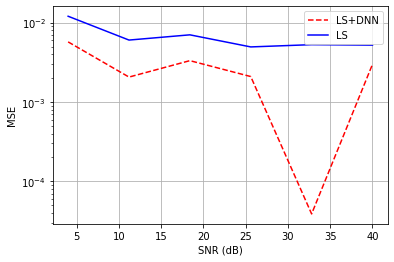

In [16]:
# plota o MSE vs as SNRs
import matplotlib.pyplot as plt

plt.figure()
plt.plot(ax,ay[:,0], "r--")
plt.plot(ax,ayLS, "b-")
plt.legend(["LS+DNN", "LS"])
plt.yscale('log')
plt.xlabel("SNR (dB)")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

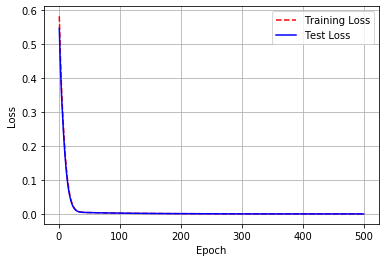

In [17]:
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epoch_count = range(1, len(training_loss) + 1)


# plota o histórico da perda durante o treinamento
plt.figure()
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show();